In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/object-detection-ex-template (1)/model")  #change folder name accordingly
print(os.getcwd())
print(os.listdir())

# with open("./test.txt", "w") as f:  # verify that you did get a new file in your Drive
#   f.write("Hello, world!")

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/object-detection-ex-template (1)/model
['utils.py', 'transforms.py', 'coco_utils.py', 'engine.py', 'model.py', 'weights', '.ipynb_checkpoints', 'PennFudanPed', '__pycache__', 'train.py', 'dt_ob_det.ipynb']


In [1]:
# import train
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from model import Wrapper

In [2]:
# train.main()

In [3]:
# For visual evaluation
wrapper = Wrapper()

In [4]:
os.chdir("../eval")  #change folder name accordingly
print(os.getcwd())
print(os.listdir())

/home/charis/Desktop/ETH/Semester_1/Duckietown/object-detection-ex-template/eval
['map_sol.py', 'dataset3', '__pycache__', 'dataset4', 'Dockerfile', 'dataset', 'Dockerfile.patcher', 'Makefile', 'grading_sol.py']


In [5]:
def _label2color(label):
    if label == 0:
        return (255, 0, 255)
    elif label == 1:
        return (100, 116, 226)
    elif label == 2:
        return (226, 111, 101)
    elif label == 3:
        return (116, 114, 117)
    elif label == 4:
        return (216, 171, 15)
    else:
        raise('invalid label')

def plot_images(images_lst, title_lst):
    _, axes = plt.subplots(1, len(images_lst), figsize=(20, 20))
    axes = axes.flatten()
    for img, title, ax in zip(images_lst, title_lst, axes):
        ax.set_title(title)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def _draw_bounding_boxes(img, boxes, labels):
    box_img = img.copy()
    for box, label in zip(boxes, labels):
        box_img = cv2.rectangle(box_img, (box[0], box[1]), (box[2], box[3]), _label2color(label), thickness=2)
    return box_img

In [6]:
i = 0
file_list = os.listdir("dataset")

1973.npz
(224, 224, 3)
(6,)


<ipython-input-5-20221ea440f7>:28: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  box_img = cv2.rectangle(box_img, (box[0], box[1]), (box[2], box[3]), _label2color(label), thickness=2)


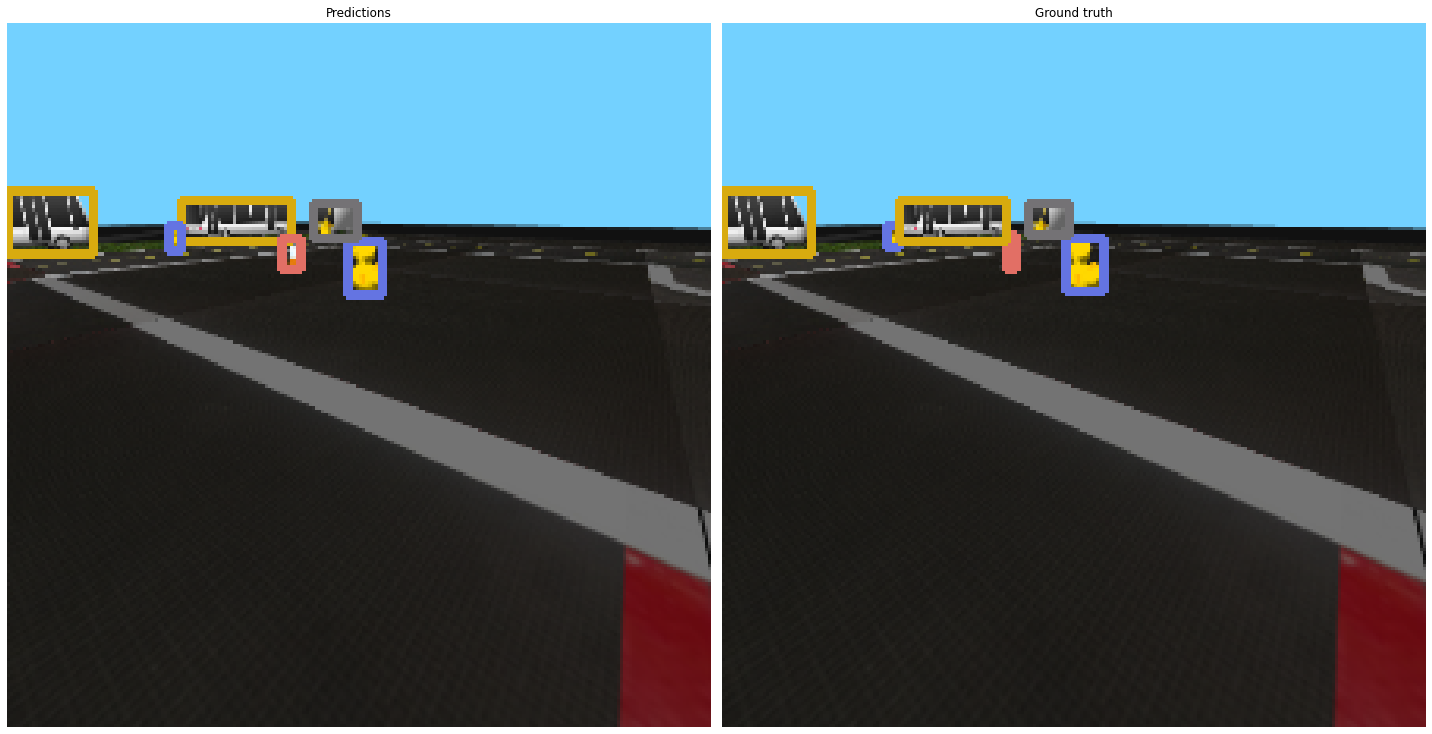

In [7]:
file = file_list[i]
print(file)
with np.load(f'./dataset/{file}') as data:
    img, boxes, classes = tuple([data[f"arr_{j}"] for j in range(3)])

    p_boxes, p_classes, p_scores = wrapper.predict(np.array([img]), 20.0)
    print(p_scores[0].shape)
    
    true_img_box = _draw_bounding_boxes(img, boxes, classes)
    pred_img_box = _draw_bounding_boxes(img, p_boxes[0], p_classes[0])

    plot_images([pred_img_box, true_img_box], ["Predictions", "Ground truth"])

i += 30